# Recommender Systems - 2025
# *Homework 1 - Evaluation Metrics*
### Due Date - 5 December, 2024

### In this assignment you will get familiar with a well-known dataset of movie ratings, and explore various RS evaluation metrics. This work will set the grounds for homework 2, in which you will build, optimize and evaluate RS models based on matrix factorization.

#### Instructions:

This notebook is an interactive assignment; please read and follow the instructions in each cell.

Assignments are to be turned in pairs, by one of the teammates.

Cells that require your input (in the form of code or written response) will have 'Question #' above.

Make sure the entire notebook runs without errors and includes all plots, code and explanations.

After completing the assignment, please download the notebook to an '.ipynb' file and submit it on moodle.

## Data exploration

In this section, you will load the MovieLens 100K rating dataset, extract a rating matix, and get familiar with the data.

The MovieLens 100K is a commonly used dataset, including 100,000 ratings (1-5) from 943 users on 1682 movies. This dataset is considered an explicit feedback dataset for having user ratings (as opposed to implicit feedback datasets where information such as clicks and views are available and can be considered as a proxy for user's preference)

In [ ]:
import os
import requests
import zipfile

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
url = "http://files.grouplens.org/datasets/movielens/ml-100k.zip"
zip_name = url.split("/")[-1]
data_dir = "ml-100k/"

r = requests.get(url, allow_redirects=True)
with open(zip_name, "wb") as f:
    f.write(r.content)

with zipfile.ZipFile(zip_name, "r") as zip_ref:
    zip_ref.extractall()

In [ ]:
cols_data = ["user_id", "item_id", "rating", "timestamp"]
cols_user = ["user_id", "age", "gender", "occupation", "zip code"]
cols_item = [
    "movie id",
    "movie_title",
    "release_date",
    "video_release_date",
    "IMDb_URL",
    "unknown",
    "Action",
    "Adventure",
    "Animation",
    "Childrens",
    "Comedy",
    "Crime",
    "Documentary",
    "Drama",
    "Fantasy",
    "Film_Noir",
    "Horror",
    "Musical",
    "Mystery",
    "Romance",
    "Sci_Fi",
    "Thriller",
    "War",
    "Western",
]

In [ ]:
df_users = pd.read_csv(
    os.path.join(data_dir, "u.user"),
    delimiter="|",
    header=None,
    names=cols_user,
)
df_users.shape

(943, 5)

In [ ]:
df_items = pd.read_csv(
    os.path.join(data_dir, "u.item"),
    delimiter="|",
    header=None,
    names=cols_item,
    encoding="ISO-8859-1",
)
df_items.shape

(1682, 24)

In [ ]:
df_ratings = pd.read_csv(
    os.path.join(data_dir, "u.data"),
    delimiter="\t",
    header=None,
    names=cols_data,
)
df_ratings.shape

(100000, 4)

---

####Question 1 (5 points)

Build a ratings matrix with users as rows, items as columns, and ratings as the elements of the matrix.

Replace empty ratings with zeros.

In [ ]:
# users as rows, items as columns and ratings as values as a matrix
# every NaN value means that the user did not rate the item and we can fill it with 0
ratings = df_ratings.pivot(index="user_id", columns="item_id", values="rating").fillna(0)

ratings.head()

item_id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,4.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

#### Question 2 (5 points)

Calculate the dataset sparsity

Remider:
$$
Sparsity = 1 - \frac{\text{number of nonzero ratings in the matrix}}{\text{number of users}\times\text{number of items}}
$$

In [ ]:
# number of non-zero ratings in the data
num_non_zero = np.sum(ratings.values != 0)
# number of users
num_users = ratings.shape[0]
# number of items
num_items = ratings.shape[1]
# sparsity of the data
sparsity = 1 - (num_non_zero / (num_users * num_items))
print(f"Sparsity of the data: {sparsity:.2f}")

Sparsity of the data: 0.94


---

#### EDA (Questions Below)

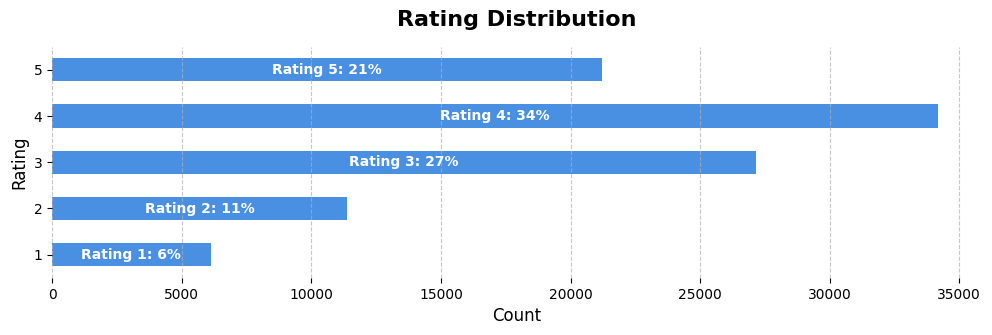

In [ ]:
p = df_ratings.groupby("rating")["rating"].agg(["count"])

fig, ax = plt.subplots(figsize=(12, 3))
p.plot(kind="barh", legend=False, ax=ax, color="#4a90e2")

ax.set_title("Rating Distribution", fontsize=16, fontweight="bold", pad=15)
ax.set_xlabel("Count", fontsize=12)
ax.set_ylabel("Rating", fontsize=12)
ax.grid(axis="x", linestyle="--", alpha=0.7)
ax.set_frame_on(False)

total_count = p["count"].sum()
for i, (index, row) in enumerate(p.iterrows()):
    percentage = (row["count"] / total_count) * 100
    ax.text(
        row["count"] / 2,
        i,
        f"Rating {index}: {percentage:.0f}%",
        color="white",
        weight="bold",
        ha="center",
        va="center",
    )

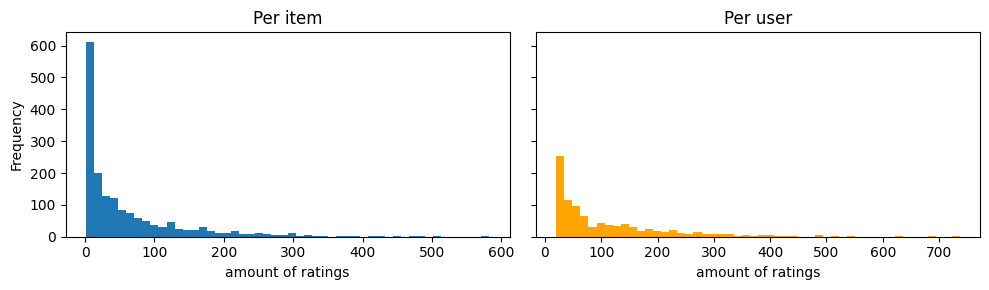

In [ ]:
fig, ax = plt.subplots(1, 2, sharex="col", sharey="row", figsize=(10, 3))

ratings.astype(bool).sum(axis=0).plot.hist(ax=ax[0], bins=50)
ratings.astype(bool).sum(axis=1).plot.hist(ax=ax[1], color="orange", bins=50)
ax[0].set_title("Per item")
ax[1].set_title("Per user")
ax[0].set_xlabel("amount of ratings")
ax[1].set_xlabel("amount of ratings")
fig.tight_layout();

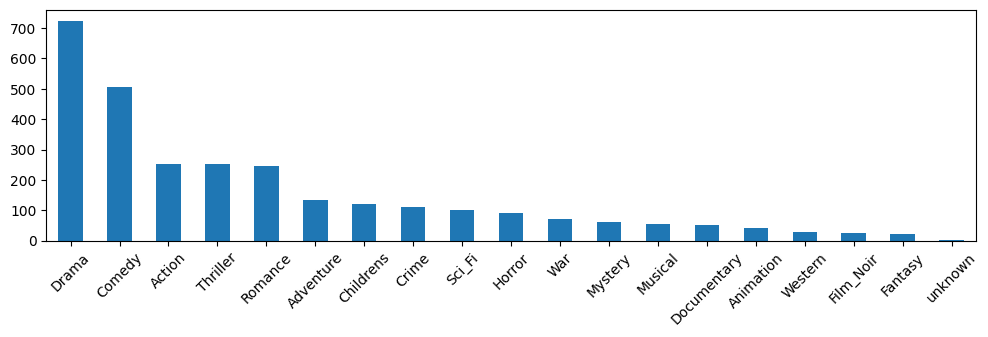

In [ ]:
plt.figure(figsize=(12, 3))
df_items.iloc[:, 5:].sum().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=45)
plt.show();

#### Question 3 (10 points)

a. How many items are frequently rated (>100 ratings)?

b. How many items are rarely rated (<10 ratings)?

c. How many users rate frequently (>100 ratings)?

d. How many users rate rarely? (<10 ratings)?

e. What challenges are we facing when building a recommender system for this dataset?

<br>
You can add additional plots or calculations to justify your answer

```
a.  334
b.  530
c.  361
d.  0
e. Looking at the MovieLens 100K stats, the main challenges are data imbalance and sparsity. Only 334 movies have >100 ratings, while 530 movies have <10 ratings, showing a clear popularity bias. User behavior is also skewed - 361 users rated >100 movies, and no users rated <10 movies (since dataset enforces 20 ratings minimum per user). This makes it tough to build reliable recommendations, especially for unpopular movies in the long tail, since we lack enough rating data to find meaningful patterns. The uneven distribution between active and inactive users also complicates user similarity calculations.
 ```

---

In [ ]:
# how many items have more the 100 ratings
# items are columns in the ratings matrix
# ratings are the values in the matrix
# we can sum the values in the columns to get the number of ratings per item
num_ratings_per_item = ratings.astype(bool).sum(axis=0)
num_popular_items = num_ratings_per_item[num_ratings_per_item > 100].shape[0]
print(f"Number of items with more than 100 ratings: {num_popular_items}")

# print("the most popular item is:")
# df_items[df_items["movie id"] == num_ratings_per_item.idxmax()]

# how many items have less than 10 ratings
num_unpopular_items = num_ratings_per_item[num_ratings_per_item < 10].shape[0]
print(f"Number of items with less than 10 ratings: {num_unpopular_items}")

# print("the least popular item is:")
# df_items[df_items["movie id"] == num_ratings_per_item.idxmin()]

# how many users have more than 100 ratings
# users are rows in the ratings matrix
# ratings are the values in the matrix
# we can sum the values in the rows to get the number of ratings per user
num_ratings_per_user = ratings.astype(bool).sum(axis=1)
num_active_users = num_ratings_per_user[num_ratings_per_user > 100].shape[0]
print(f"Number of users with more than 100 ratings: {num_active_users}")

# print(f"the most active user is:")
# df_users[df_users["user_id"] == num_ratings_per_user.idxmax()]

# how many users have less than 10 ratings
num_inactive_users = num_ratings_per_user[num_ratings_per_user < 10].shape[0]
print(f"Number of users with less than 10 ratings: {num_inactive_users}")


Number of items with more than 100 ratings: 334
Number of items with less than 10 ratings: 530
Number of users with more than 100 ratings: 361
Number of users with less than 10 ratings: 0


## Popularity based RS model - trainning & evaluation

In this section, you will divide the data into train and test sets, implement and explore various evaluation metrics, and test them on the popularity based RS model.

In [ ]:
def train_test_split(
    ratings: pd.DataFrame) -> tuple[pd.DataFrame, pd.DataFrame]:
    """Splits rating matrix to train and test.

    Args:
        ratings: rating matrix.

    Returns:
        Train and test matrices.
    """
    test = ratings.copy()
    test.iloc[:, :] = 0
    train = ratings.copy()
    for user in range(ratings.shape[0]):
        non_zero_items = ratings.iloc[user, :].to_numpy().nonzero()[0] # get the indices of non-zero ratings
        test_ratings = np.random.choice(non_zero_items, size=10, replace=False) # randomly select 10 ratings
        train.iloc[user, test_ratings] = 0 # set the selected ratings to 0 in the training set
        test.iloc[user, test_ratings] = ratings.iloc[user, test_ratings] # set the selected ratings to the test set

    # Test and training are truly disjoint.
    assert(np.all((train * test) == 0))
    return train, test

train, test = train_test_split(ratings)
train.shape, test.shape

((943, 1682), (943, 1682))

#### Question 4 (60 points)
Implement the following evaluation metrics using only numpy and pandas:
1. RMSE
2. MRR
3. DCG
4. IDCG
5. nDCG
6. MAP


####Reminder:

<img src='https://drive.google.com/uc?id=1KAaJ5RRHFrMseBTnW1o71ZvrpbrxeQ4f' width="250">

<img src='https://drive.google.com/uc?id=18bVps-_zx07aLcHXFisPQoMaibAJ4nzP' width="250">

<img src='https://drive.google.com/uc?id=1jO7owkzOmcRbHpWn7LgWdq0GNQFD1665' width="350">

<img src='https://drive.google.com/uc?id=1tg-Kl1hYu3WVzQ26fMfA7KQ8S8JqWVnh' width="600">

Notes:
* Refer to the slides about 'Recommender Systems Evaluation' for the math formulas.
* Consider edge cases such as division by zero, NaN, Null, Zeros, out of bound, eval time, etc.
* You may change the function signatures (but not required).





In [ ]:
class PopularityRS:

    def __init__(self, train: pd.DataFrame):
      """Trains popularity based recommender system model.

        Args:
          train: rating matrix.
      """
      self.train = train
      self.n_users, self.n_items = train.shape
      self.model_params = {}

    def fit_popularity(self):
        """Computes parameters in a popularity-based algorithm."""
        self.model_params["popularity"] = np.zeros(self.train.shape)
        popularity = self.model_params["popularity"]
        item_avg = np.ma.masked_equal(self.train, value=0).mean(axis=0)
        item_avg[np.isnan(item_avg)] = 0
        for i in range(1, self.n_items):
            popularity[:, i] = item_avg.data[i]
        self.model_params["popularity"] = popularity

    def recommend_unseen(self, user: int, n_items: int) -> list:
        """Recommends unseen items per user, oredered by predicted ratings desc.

        Args:
          user: user id.
          n_items: number of items to suggest.

        Returns:
          Top suggestions.
        """
        predicted_ratings = self.model_params["popularity"][user]
        pred_sorted = np.argsort(predicted_ratings)[::-1]
        unseen_movie = np.where(self.train.iloc[user] == 0)
        final = pred_sorted[np.in1d(pred_sorted, unseen_movie)]
        return final[:n_items]

    def predict(self, user: int, item: int) -> float:
        """Predicts the rating of a specific item for a specific user.

        Args:
          user: user id.
          item: item id.

        Returns:
          Predicted rating.
        """
        predicted_rating = self.model_params["popularity"][user, item]
        return predicted_rating

    def predict_all(self):
        """Predicts ratings for every user and item."""
        predictions = np.zeros(shape=(self.n_users, self.n_items))
        for u in range(self.n_users):
            for i in range(self.n_items):
                predictions[u, i] = self.predict(u, i)
        return predictions

    def rmse(self, actual: pd.DataFrame) -> float:
        """Computes the total RMSE of a model, compared to the actual rating.

        Args:
          actual: actual rating matrix.

        Returns:
          Total RMSE.
        """
        # square root of the mean of the squared differences between the predicted and actual ratings
        rmse = np.sqrt(np.mean((self.predict_all() - actual) ** 2))
        return rmse

    def mrr(self, test: pd.DataFrame, k: int = 5) -> float:
      """Computes the Mean Reciprocal Rank for all users.

      Note: relevancy is considered rating 3 or above.

      Args:
          test: rating matrix.
          k: cutoff value.

      Returns:
          MRR score.
      """
      # Number of users
      n_users = test.shape[0]

      # Store reciprocal ranks for each user
      reciprocal_ranks = []

      for u in range(n_users):
          # Get top k recommendations for user
          top_k = self.recommend_unseen(u, k)

          # Get relevant items (rated >= 3) for this user
          relevant_items = set(np.where(test.iloc[u] >= 3)[0])

          # Find first position where we have a relevant item
          first_rel_pos = None
          for pos, item in enumerate(top_k):
              if item in relevant_items:
                  first_rel_pos = pos
                  break

          # If we found a relevant item, add its reciprocal rank
          if first_rel_pos is not None:
              reciprocal_ranks.append(1.0 / (first_rel_pos + 1))
          else:
              reciprocal_ranks.append(0.0)  # No relevant items found in top-k

      # Calculate MRR as mean of reciprocal ranks
      mrr = float(np.mean(reciprocal_ranks))
      return mrr


    def dcg(self, user: int, test: pd.DataFrame, k: int = 5) -> float:
        """Computes the Discounted Cumulative Gain for a specific user.

        Args:
            user: user id.
            test: rating matrix.
            k: cutoff value.

        Returns:
            DCG.
        """
        # compute the relevance scores for the items in the top-k recommendations
        top_k = self.recommend_unseen(user, k)
        if len(top_k) == 0:  # Handle case when no recommendations
            return 0.0

        relevance_scores = [1 if test.iloc[user, idx] >= 3 else 0 for idx in top_k[:k]]
        if not relevance_scores:  # Handle empty relevance scores
            return 0.0

        # compute the discounted cumulative gain
        dcg = relevance_scores[0]  # First element without discount
        if len(relevance_scores) > 1:
            dcg += np.sum(relevance_scores[1:] / np.log2(np.arange(2, len(relevance_scores) + 1)))
        return float(dcg)


    def idcg(self, user: int, test: pd.DataFrame, k: int = 5) -> float:
        """Computes the Idealized Discounted Cumulative Gain for a given user.

        Args:
            user: user id.
            test: rating matrix.
            k: cutoff value.

        Returns:
            iDCG.
        """
        # Get sorted relevance scores (non-zero scores only)
        user_ratings = test.iloc[user, :].to_numpy()
        relevant_items = (user_ratings >= 3).astype(int)
        top_k = np.sort(relevant_items)[::-1][:k]

        if len(top_k) == 0:  # Handle case when no relevant items
            return 0.0

        # compute the idealized discounted cumulative gain
        idcg = top_k[0]  # First element without discount
        if len(top_k) > 1:
            idcg += np.sum(top_k[1:] / np.log2(np.arange(2, len(top_k) + 1)))
        return float(idcg)

    def mean_ndcg(self, test: pd.DataFrame, k: int = 5) -> float:
        """Computes Mean Normalized Discounted Cumulative Gain for all users.

        Args:
          test: rating matrix.
          k: cutoff value.

        Returns:
          Mean nDCG.
        """
        ndcgs = []
        for u in range(self.n_users):
            dcg_val = self.dcg(u, test, k)
            idcg_val = self.idcg(u, test, k)

            # Handle division by zero
            if idcg_val > 0:
                ndcgs.append(dcg_val / idcg_val)
            elif dcg_val == 0 and idcg_val == 0:
                ndcgs.append(1.0)  # Both DCG and IDCG are 0, consider it perfect match
            else:
                ndcgs.append(0.0)  # IDCG is 0 but DCG isn't, consider it worst case
        return float(np.mean(ndcgs))

    def map(self, test: pd.DataFrame, k: int = 5) -> float:
        """Computes the mean average precision for all users.

        Note: relevancy is considered rating 3 or above.

        Args:
          test: rating matrix.
          k: cutoff value.

        Returns:
          Overall MAP.
        """
        # Number of users
        n_users = test.shape[0]

        # Store average precision for each user
        avg_precisions = []

        for u in range(n_users):
            # Get top k recommendations for user
            top_k = self.recommend_unseen(u, k)

            # Get relevant items (rated >= 3) for this user
            relevant_items = set(np.where(test.iloc[u] >= 3)[0])

            # Get L = number of relevant items
            L = len(relevant_items)

            # Calculate precision at each position up to k
            precisions = []
            num_hits = 0
            sum_precision = 0

            for pos, item in enumerate(top_k):
              if item in relevant_items:
                  num_hits += 1
                  # precision@j
                  precision_at_j = num_hits / (pos + 1)
                  # multiply by relevant@j (which is 1 since we're in if condition)
                  sum_precision += precision_at_j

            # Use min(k,L) as denominator per the formula
            if L > 0:
                avg_precision = sum_precision / min(k, L)
                avg_precisions.append(avg_precision)
            else:
                avg_precisions.append(0.0)

        # Calculate MAP as per formula MAP@k = (1/|U|) * ∑(avgpre@k(u))
        map_score = float(np.mean(avg_precisions))
        return map_score


Train and evaluate the popularity based model using your metrics:

In [ ]:
model = PopularityRS(train)
model.fit_popularity()

evaluation_results = {
    "RMSE training": model.rmse(train),
    "RMSE test": model.rmse(test),
    "MRR k=5 test": model.mrr(test, 5),
    "MRR k=10 test": model.mrr(test, 10),
    "Mean NDCG k=5 test": model.mean_ndcg(test, 5),
    "Mean NDCG k=10 test": model.mean_ndcg(test, 10),
    "MAP k=5 test": model.map(test, 5),
    "MAP k=10 test": model.map(test, 10),
}

results = pd.DataFrame(evaluation_results, index=["Metric Value"]).T
results

,Metric Value
RMSE training,0.811096
RMSE test,0.422955
MRR k=5 test,0.260410
MRR k=10 test,0.288686
Mean NDCG k=5 test,0.122846
Mean NDCG k=10 test,0.120475
MAP k=5 test,0.070042
MAP k=10 test,0.051013


---

#### Question 5 (10 points)

Discuss what would you consider to be a more suitable evaluation metric for this specific dataset.

``` Your response here ```
Based on the observation for the MovieLens 100K dataset, which is sparse and exhibits popularity bias, MAP or nDCG provide a better assessment of a recommender system's performance. They focus on the quality and order of recommendations, which is more aligned with real-world usage scenarios than the approach of RMSE

---

#### Question 6 (10 points)
Discuss the pros and cons of these evaluation metrics in general.

``` Your response here ```<br>
<b>RMSE</b><br>
Pros:

* Easy to understand and interpret: `It represents the average difference between predicted and actual ratings, making it intuitive.`
* Sensitive to large errors: `It penalizes larger errors more heavily, which can be desirable in some contexts.`
* Widely used:` It's a standard metric for regression tasks and allows for easy comparison across models.`

Cons:

* Assumes rating scale linearity: `It may not be suitable for ordinal ratings where the difference between ratings is not necessarily uniform.`
* Sensitive to outliers: `Extreme rating values can disproportionately influence RMSE.`
* Not ideal for implicit feedback: `It focuses on rating prediction, which might not be the primary goal in recommender systems with implicit feedback.`

<b>MRR</b><br>
Pros:

* Easy to compute and understand: `It's straightforward to calculate and interpret.`
* Focuses on the first relevant item: `It emphasizes the position of the first relevant recommendation, which is often important for user satisfaction.`
* Suitable for ranking tasks: `It's a ranking metric that considers the order of recommendations.`

Cons:

* Only considers the first relevant item: `It doesn't account for the relevance of other recommendations in the list.`
* Sensitive to the position of the first relevant item: `A small change in the position of the first relevant item can significantly affect MRR.`
* May not be comprehensive: `It provides a limited view of overall ranking quality.`

<b>DCG, IDCG, and nDCG </b><br>
Pros:

* Consider both relevance and order: `They incorporate the relevance of recommendations and their position in the list.`
* Handles graded relevance: `They can accommodate different levels of relevance (e.g., ratings on a scale).`
* Widely used in information retrieval: `They are standard metrics for evaluating ranked lists.`

Cons:

* More complex to compute: `Calculating DCG and IDCG can be more involved compared to simpler metrics.`
* Sensitive to the choice of discount function: `Different discount functions can lead to different results.`
* Requires defining relevance levels: `It needs a clear definition of what constitutes a relevant recommendation.`

<b>MAP</b><br>
Pros:

* Considers precision at all relevant positions: `It takes into account the precision at each position where a relevant item is found.`
* Robust to the number of relevant items: `It's less sensitive to variations in the number of relevant items per user.`
* Widely used for ranking tasks: `It's a standard metric for evaluating recommender systems and information retrieval systems.`

Cons:

* More complex to compute compared to MRR: `It involves calculating precision at multiple positions.`
* Requires binary relevance judgments: `It assumes a clear distinction between relevant and irrelevant items.`
* Can be influenced by the length of the recommendation list: `Longer lists may have lower MAP scores even if they contain more relevant items overall.`

---